In [79]:
#import dependencies
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('House_Rent_main3.csv')
df1=df
df1.sample(5)

,Unnamed: 0,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
3569,3588,2022-07-02,3,18000,1000,7 out of 18,2,"Kelambakkam, Old Mahabalipuram Road",5,1,Bachelors/Family,2
1225,1236,2022-06-28,3,55000,999,14 out of 23,2,"Orchid Residency, Link Road",2,2,Family,2
848,857,2022-06-03,4,150000,1705,16 out of 29,2,"Adani Western Heights, Andheri West",2,2,Family,3
2146,2161,2022-05-23,2,12000,850,Ground out of 4,1,Basaveshwar Nagar,3,2,Bachelors/Family,1
1763,1778,2022-05-19,2,17000,1387,Ground out of 4,1,"Nobo Nagar, Kalena Agrahara",3,2,Bachelors/Family,3


In [81]:
df1.replace(to_replace="Hyderabad",
           value="6")

,Unnamed: 0,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,1,1,Bachelors/Family,2
1,1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",1,2,Bachelors/Family,1
2,2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,1,2,Bachelors/Family,1
3,3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,1,1,Bachelors/Family,1
4,4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,1,1,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4713,4741,2022-05-18,2,15000,1000,3 out of 5,2,Bandam Kommu,6,2,Bachelors/Family,2
4714,4742,2022-05-15,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",6,2,Bachelors/Family,3
4715,4743,2022-07-10,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",6,2,Bachelors/Family,3
4716,4744,2022-07-06,3,45000,1500,23 out of 34,2,Gachibowli,6,2,Family,2


In [82]:
print(df1["BHK"].unique()) 

[2 1 3 4]


In [83]:
#Describing data after preprocessing 
print(df1.shape) 

(4718, 12)


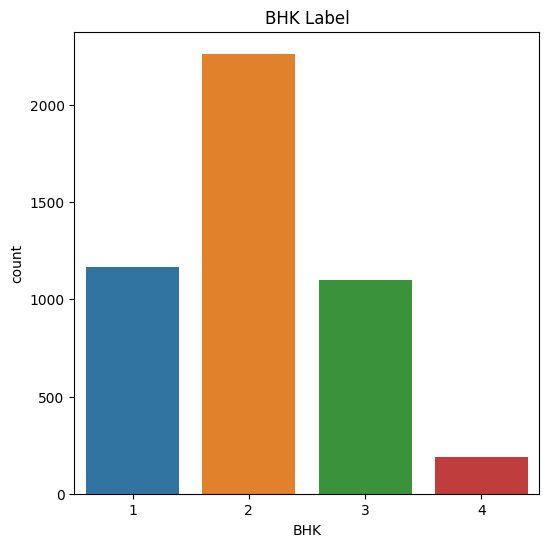

In [84]:
df1.BHK.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='BHK', data=df1)
plt.title('BHK Label')
plt.show()

In [85]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# print info about columns in the dataframe
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4718 non-null   int64 
 1   Posted On          4718 non-null   object
 2   BHK                4718 non-null   int64 
 3   Rent               4718 non-null   int64 
 4   Size               4718 non-null   int64 
 5   Floor              4718 non-null   object
 6   Area Type          4718 non-null   object
 7   Area Locality      4718 non-null   object
 8   City               4718 non-null   object
 9   Furnishing Status  4718 non-null   int64 
 10  Tenant Preferred   4718 non-null   object
 11  Bathroom           4718 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 442.4+ KB
None


In [86]:
# normalise the amount column
# data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1))

data['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
Name: BHK, dtype: int64

In [87]:
#x = df.drop('Attrition', axis=1)
x = df1.drop(['BHK','Size', 'Rent', 'City'], axis=1)
y = df1['BHK']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [88]:
y_train.shape, y_test.shape


((3774,), (944,))

In [89]:
y_train.value_counts()/len(y_train)


2    0.479862
1    0.247483
3    0.232644
4    0.040011
Name: BHK, dtype: float64

In [90]:
y_test.value_counts()/len(y_test)


2    0.479873
1    0.246822
3    0.233051
4    0.040254
Name: BHK, dtype: float64

In [93]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 1811, 1: 934, 3: 878, 4: 151})


ValueError: could not convert string to float: '2022-07-06'